# 读取数据和引入模块

In [1]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
import toad

In [2]:
data_train = pd.read_csv('data_train.csv',index_col = 0)
data_train

installment_BIN  annual_inc_BIN  dti_BIN  revol_bal_BIN  \
16023               5.0             3.0      2.0            2.0   
83008               3.0             3.0      2.0            4.0   
115373              5.0             3.0      3.0            4.0   
34581               5.0             4.0      2.0            3.0   
26174               5.0             2.0      3.0            3.0   
...                 ...             ...      ...            ...   
18755               4.0             4.0      1.0            3.0   
139375              4.0             3.0      1.0            2.0   
105880              3.0             3.0      3.0            3.0   
107207              2.0             2.0      4.0            3.0   
120453              1.0             3.0      3.0            4.0   

        open_il_24m_BIN  mths_since_rcnt_il_BIN  all_util_BIN  \
16023               4.0                     3.0           2.0   
83008               3.0                     2.0           4.0   
115373              3.0                     2.0           2.0   
34581               3.0                     2.0           4.0   
26174               3.0                     2.0           4.0   
...                 ...                     ...           ...   
18755               3.0                     3.0           4.0   
139375              3.0                     2.0           1.0   
105880              4.0                     1.0           4.0   
107207              4.0                     1.0           4.0   
120453              2.0                     3.0           3.0   

        avg_cur_bal_BIN  bc_open_to_buy_BIN  mo_sin_old_il_acct_BIN  \
16023               1.0                 4.0                     4.0   
83008               2.0                 1.0                     4.0   
115373              1.0                 4.0                     4.0   
34581               3.0                 2.0                     3.0   
26174               1.0                 1.0                     3.0   
...                 ...                 ...                     ...   
18755               1.0                 1.0                     4.0   
139375              2.0                 4.0                     4.0   
105880              2.0                 3.0                     4.0   
107207              1.0                 2.0                     3.0   
120453              1.0                 3.0                     3.0   

        mo_sin_old_rev_tl_op_BIN  mort_acc_BIN  num_il_tl_BIN  \
16023                        3.0           1.0            4.0   
83008                        3.0           2.0            4.0   
115373                       1.0           1.0            4.0   
34581                        1.0           2.0            3.0   
26174                        3.0           3.0            2.0   
...                          ...           ...            ...   
18755                        2.0           1.0            4.0   
139375                       3.0           3.0            4.0   
105880                       3.0           4.0            4.0   
107207                       1.0           1.0            3.0   
120453                       3.0           1.0            2.0   

        num_rev_tl_bal_gt_0_BIN  percent_bc_gt_75_BIN  term_BIN  \
16023                       2.0                   1.0         1   
83008                       3.0                   3.0         1   
115373                      2.0                   1.0         2   
34581                       3.0                   1.0         2   
26174                       3.0                   4.0         2   
...                         ...                   ...       ...   
18755                       3.0                   3.0         1   
139375                      4.0                   1.0         1   
105880                      2.0                   2.0         1   
107207                      3.0                   1.0         1   
120453                      2.0                   3

In [3]:
X_train = data_train.drop(columns = ['loan_status'])
y_train = data_train['loan_status']

In [4]:
X_train.shape,y_train.shape

((26313, 19), (26313,))

In [5]:
y_train.value_counts()

0    19016
1     7297
Name: loan_status, dtype: int64

In [6]:
data_test = pd.read_csv('data_test.csv',index_col = 0)
data_test

installment_BIN  annual_inc_BIN  dti_BIN  revol_bal_BIN  \
48588               5.0             2.0      2.0            3.0   
633                 2.0             1.0      1.0            2.0   
100990              1.0             3.0      1.0            1.0   
28846               5.0             3.0      1.0            3.0   
142311              4.0             3.0      4.0            5.0   
...                 ...             ...      ...            ...   
17896               2.0             3.0      3.0            1.0   
89587               4.0             2.0      3.0            3.0   
113265              4.0             3.0      4.0            3.0   
70041               3.0             2.0      4.0            3.0   
35755               5.0             2.0      4.0            4.0   

        open_il_24m_BIN  mths_since_rcnt_il_BIN  all_util_BIN  \
48588               2.0                     3.0           1.0   
633                 1.0                     4.0           2.0   
100990              2.0                     2.0           4.0   
28846               1.0                     4.0           1.0   
142311              3.0                     2.0           4.0   
...                 ...                     ...           ...   
17896               4.0                     2.0           4.0   
89587               4.0                     2.0           4.0   
113265              4.0                     2.0           4.0   
70041               2.0                     2.0           2.0   
35755               4.0                     2.0           3.0   

        avg_cur_bal_BIN  bc_open_to_buy_BIN  mo_sin_old_il_acct_BIN  \
48588               2.0                 4.0                     3.0   
633                 1.0                 2.0                     4.0   
100990              2.0                 1.0                     4.0   
28846               2.0                 4.0                     4.0   
142311              2.0                 1.0                     4.0   
...                 ...                 ...                     ...   
17896               3.0                 2.0                     4.0   
89587               1.0                 2.0                     3.0   
113265              1.0                 1.0                     4.0   
70041               1.0                 3.0                     4.0   
35755               2.0                 3.0                     3.0   

        mo_sin_old_rev_tl_op_BIN  mort_acc_BIN  num_il_tl_BIN  \
48588                        2.0           3.0            2.0   
633                          1.0           1.0            2.0   
100990                       3.0           2.0            3.0   
28846                        3.0           3.0            1.0   
142311                       3.0           2.0            3.0   
...                          ...           ...            ...   
17896                        3.0           3.0            4.0   
89587                        1.0           1.0            4.0   
113265                       2.0           1.0            4.0   
70041                        2.0           1.0            3.0   
35755                        3.0           3.0            3.0   

        num_rev_tl_bal_gt_0_BIN  percent_bc_gt_75_BIN  term_BIN  \
48588                       3.0                   1.0         1   
633                         2.0                   3.0         1   
100990                      1.0                   1.0         1   
28846                       2.0                   1.0         1   
142311                      3.0                   4.0         1   
...                         ...                   ...       ...   
17896                       1.0                   1.0         1   
89587                       3.0                   3.0         1   
113265                      3.0                   3.0         1   
70041                       2.0                   3.0         1   
35755                       4.0                   4

In [7]:
X_test = data_test.drop(columns = ['loan_status'])
y_test = data_test['loan_status']

In [8]:
X_test.shape,y_test.shape

((6579, 19), (6579,))

In [9]:
y_test.value_counts()

0    4777
1    1802
Name: loan_status, dtype: int64

# 模型训练

## 网格搜索

In [10]:
param={'max_depth':np.arange(2,10,1),'class_weight':[{1: 1, 0: 1}, {1: 2, 0: 1}, {1: 3, 0: 1}]}
gridsearch=GridSearchCV(estimator=DecisionTreeClassifier(),
                                          param_grid=param,cv=3,scoring='f1',n_jobs=-1,verbose=2)
gridsearch.fit(X_train,y_train)
gridsearch.best_score_,gridsearch.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


(0.4689165706548984, {'class_weight': {1: 3, 0: 1}, 'max_depth': 6})

## 训练模型

In [11]:
DT_model=DecisionTreeClassifier(max_depth=gridsearch.best_params_['max_depth'],class_weight=gridsearch.best_params_['class_weight'])
DT_model_fit=DT_model.fit(X_train,y_train)

## 预测与评估

### 混淆矩阵

In [12]:
y_pred_test = DT_model_fit.predict(X_test)
y_pred_train = DT_model_fit.predict(X_train)
cnf_matrix = sk.metrics.confusion_matrix(y_test,y_pred_test)
cnf_matrix = pd.DataFrame(cnf_matrix,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cnf_matrix

预测为好  预测为坏
标签为好  2366  2411
标签为坏   460  1342

### 评估指标

In [13]:
accuracy=sk.metrics.accuracy_score(y_test,y_pred_test)
y_score=DT_model_fit.predict_proba(X_test)[:,1]
auc=sk.metrics.roc_auc_score(y_test,y_score)
fpr,tpr,threshold=sk.metrics.roc_curve(y_test,y_score)
ks=max([trp_ - fpr_ for trp_, fpr_ in zip(tpr, fpr)])
psi=toad.metrics.PSI(y_pred_train,y_pred_test)
estimate=pd.DataFrame([[accuracy,auc,ks,psi]],columns=['准确率','AUC','KS值','PSI'])
estimate

准确率      AUC       KS值       PSI
0  0.563611  0.66877  0.250171  0.000006

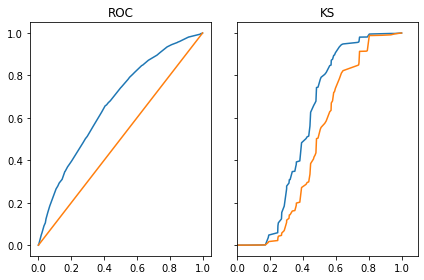

In [14]:
y_proba = DT_model_fit.predict_proba(X_test)
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test))):
    fpr,tpr,thresholds = roc_curve(y_test,y_proba[:,i],pos_label = i)
axe1.plot(fpr,tpr)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds,tpr,label = 'TPR')
axe2.plot(1 - thresholds,fpr,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()